# Förderhinweis

Dieses Dokument ist Teil des Lehrmaterials für die **Zusatzqualifikation KI und Maschinelles Lernen.** 

Die Entwicklung und Erprobung dieses Bildungsangebotes wurde vom Bundesministerium für Bildung und Forschung im Rahmen des InnoVET-Programms gefördert.

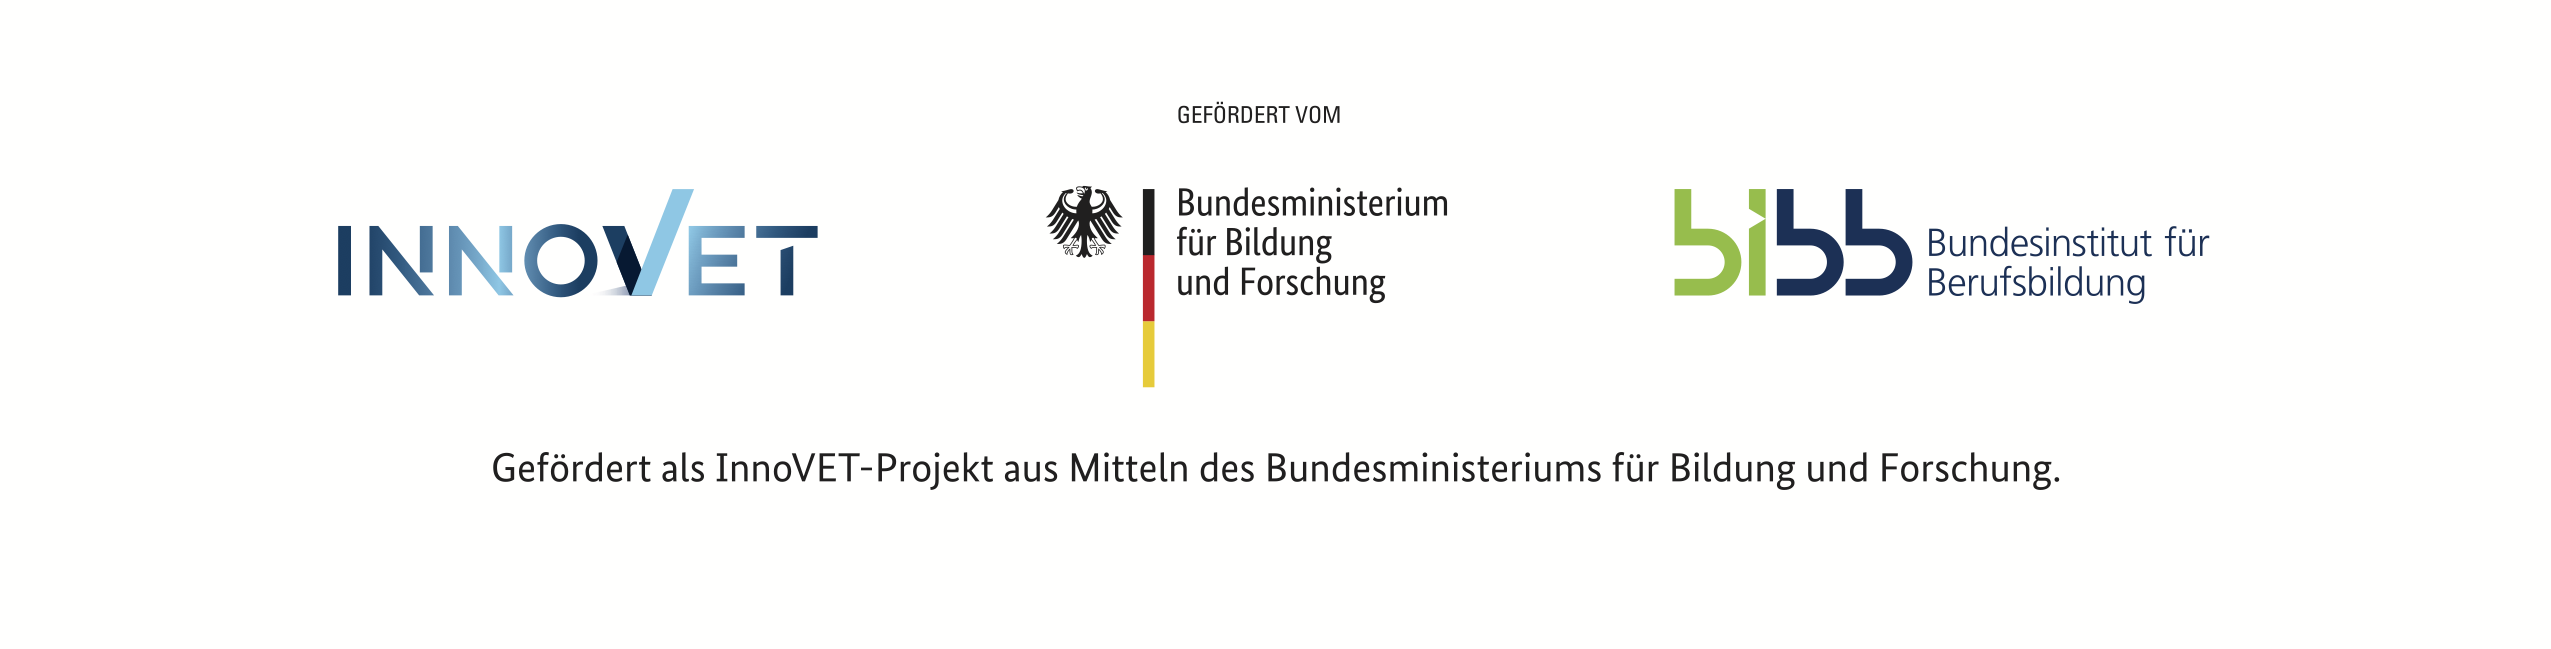

# Lizenzhinweis

Dieses Notebook "Training und Test" wurde von Dirk Väth, Lindsey Vanderlyn und Antje Schweitzer, KI B3 / Universität Stuttgart, erstellt. 

Das Werk, mit Ausnahme der oben abgebildenten Förderlogos, ist lizenziert unter [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/deed.de) (Namensnennung 4.0 International)

# Training und Test 

In diesem Notebook werden wir sehen, weshalb es nicht ausreicht, ein Modell auf den Daten zu evaluieren, die schon zum Training benutzt wurden.

## Bibliotheken laden

Wir benötigen zum Erstellen des Klassifikationsbaums wieder das Modul `tree` aus der Bibliothek `sklearn` und für das Laden des Iris-Datensatzes die Bibliothek `pandas`. Ebenso benötigen wir wieder die Bibliothek `matplotlib`, damit wir unser Modell und dessen Evaluierung visualisieren können.

In [39]:
import pandas                 # Bibliothek für das Laden der Iris-Daten
from sklearn import tree      # Bibliothek für den Entscheidungsbaum
from matplotlib import pyplot # Bibliothek für die Visualisierung

## Daten laden, vorbereiten und filtern

Innerhalb dieses Abschnitts wiederholen wir die Schritte, wie wir schon im Kapitel *Klassifikationsbäume* kennengelernt haben, um einen Entscheidungsbaum für den Iris-Datensatz zu trainieren.

Wir können nun mit dem selben Code wie bei den Aufgaben im [Notebook zu den Parametern beim Training von Klassifikationsbäumen](https://colab.research.google.com/drive/12Bsc2Cnh7cjC9GC0vJVnrq948tcsm0ii?usp=sharing) die Bäume trainieren. 

Diesmal wollen wir aber gerne beurteilen, wie gut unser Baum wirklich ist. 
**Als Neuerung teilen wir dafür den Datensatz in 2 verschiedene Teildatensätze: in Trainingsdaten und Testdaten.** Wir können den auf den Trainingsdaten erstellten Baum dann auf den Testdaten ausprobieren. Wenn er auch auf den Testdaten gut funktioniert, wurden sinnvolle Regelmäßigkeiten gelernt. Man sagt: der Baum **generalisiert** gut; wenn er auf den Testdaten schlecht funktioniert, wurden dagegen zufällige Details aus den Trainingsdaten gelernt. 

---

**Mithilfe unabhängiger Testdaten kann man überprüfen, wie gut ein Modell generalisiert.**

---


In [40]:
 # Daten laden
iris_url = 'https://datahub.io/machine-learning/iris/r/iris.csv'
iris = pandas.read_csv(iris_url)

# englische Begriffe übersetzen
iris.rename(columns = {'sepallength':'Kelchblattlänge','sepalwidth':'Kelchblattbreite', 'petallength':'Kronblattlänge', 'petalwidth':'Kronblattbreite', 'class':'Irisart'}, inplace=True)
# erste Zeilen anzeigen
print(iris.head())

   Kelchblattlänge  Kelchblattbreite  Kronblattlänge  Kronblattbreite  \
0              5.1               3.5             1.4              0.2   
1              4.9               3.0             1.4              0.2   
2              4.7               3.2             1.3              0.2   
3              4.6               3.1             1.5              0.2   
4              5.0               3.6             1.4              0.2   

       Irisart  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


In [41]:
# Data Frames für die erklärenden Variablen sowie die erklärte Variable generieren (für alle Daten)
daten = pandas.DataFrame(iris[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge', 'Irisart']])

## Aufteilung des Datensatzes in Trainings- und Testdaten

Hier wollen wir verdeutlichen, wie wichtig es ist, immer einen separaten Datensatz zum Testen zu haben. Da wir hier keinen vergleichbaren separaten Datensatz woanders herbekommen können, teilen wir den Datensatz, den wir schon haben, in 2 Teile. Die Idee ist dann, unser Modell nur auf den Trainingsdaten zu trainieren und danach mit den Testdaten auszuwerten.

*   Training: enthält die ersten 110 Datenpunkte aus dem gesamten Datensatz
*   Testen: enthält die letzten 40 Datenpunkte aus dem gesamten Datensatz

Das entspricht einer Aufteilung von ca. 75% fürs Training und ca. 25% fürs Testen - diese Größenordnung ist durchaus üblich. Dadurch reduziert man die Menge der Daten, aus denen gelernt werden kann, nicht allzusehr und hat noch Daten übrig zum Testen. 


---

**Üblicherweise verwendet man den Großteil der Daten zum Training und behält einen kleineren Teil zum Testen.**

---



Als nächstes werden wir einen Klassifikationsbaum auf den Trainingsdaten trainieren und anschließend erst auf den Trainingsdaten und dann auf den Testdaten evaluieren. 
Vielleicht können Sie sich schon denken, wie das Ergebnis aussehen wird?

In [42]:
# Erstelle Datensatz für Training
daten_training = iris.iloc[0:110]  # Nimm die ersten 110 Datenpunkte aus dem Datensatz
X_training = daten_training[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge']] # Data Frames für die erklärenden Variablen generieren
y_training = daten_training['Irisart'] # Data Frames für die erklärte Variable generieren
# Anzahl der Datenpunkte ausgeben (die Funktion len ergibt die Länge eines Arrays )
print("Datenpunkte Training:", len(daten_training)) # Ausgeben, wie groß unser Training-Datensatz ist 

# Erstelle Datensatz für Test
daten_test = iris.iloc[110:150] # Nimm die letzten 40 Datenpunkte aus dem Datensatz
X_test = daten_test[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge']] # Data Frames für die erklärenden Variablen generieren
y_test = daten_test['Irisart'] # Data Frames für die erklärte Variable generieren
print("Datenpunkte Test:", len(daten_test)) # Ausgeben, wie groß unser Training-Datensatz ist 

Datenpunkte Training: 110
Datenpunkte Test: 40


## Entscheidungsbaum trainieren

Nachdem wir nun einen Datensatz für das Training erstellt haben, können wir unser Modell wie bisher darauf trainieren.

Da wir schon gesehen haben, dass per Zufall bestimmt wird, welche Attribute an den Knoten stehen, falls es Attribute gibt, die gleich gut sind, verwenden wir hier beim Initialisieren des Baums die Option `random_state` mit dem Wert 42. 

Diese Option hat Einfluss auf den Zufallsgenerator, mit dem der Computer zufällige Werte generiert. So ein Zufallsgenerator muss immer mit einem beliebigen Wert initialisiert werden, dem sogenannten *Random Seed* (deutsch auch *Startwert*) und es ist garantiert, dass er bei Initialisierung mit demselben Random Seed immer dieselben zufälligen Werte liefern wird. 

Durch die Option `random_state=42` legen wir also den Random Seed auf 42 fest - und damit ist garantiert, dass jede/r, der/die dieses Notebook mit demselben Random Seed ausführt, auch denselben Baum bekommt. 


---

**Der Random Seed wird zur Initialisierung des Zufallsgenerators genutzt. Mit demselben Random Seed erhält man bei zufälligen Entscheidungen jedes Mal dieselbe Entscheidung bekommt.**

---

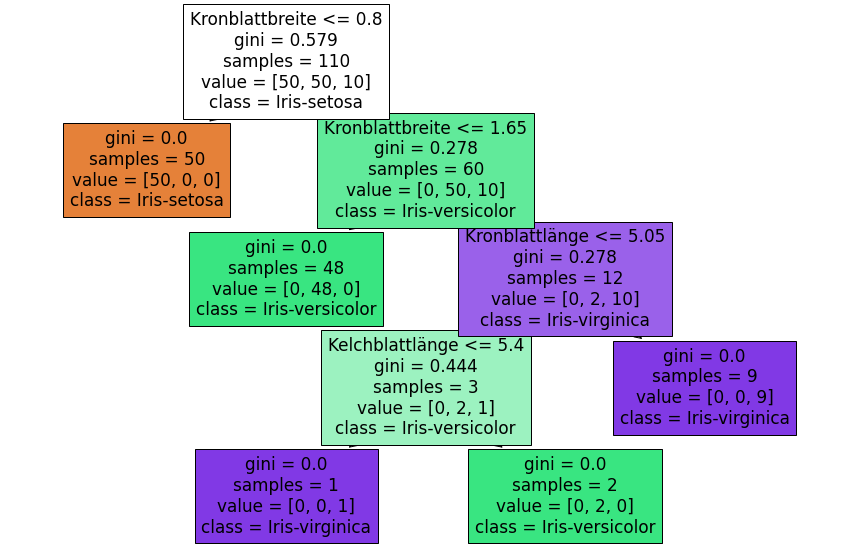

In [43]:
# Baum initialisieren (vorbereiten)
baum = tree.DecisionTreeClassifier(random_state=42)
# Baum trainieren
baum.fit(X_training, y_training)
# Baum grafisch darstellen
features = ['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge'] # Features benennen
klassen = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']                       # Klassen benennen
pyplot.figure(figsize=(15,10))                                               # Größere Grafikfläche vorbereiten
tree.plot_tree(baum,feature_names=features,class_names=klassen,filled=True); # Baum zeichnen

Wie gut ist unser Entscheidungsbaum?
Diese Frage müssen wir nun eigentlich präziser stellen:

*   Wie gut kann unser Modell die Daten lernen, die wir ihm geben? Ein Problem könnte z.B. zu kleine Modellkapazität sein (der Entscheidungsbaum benötigt mehr Tiefe, um mit der Komplexität der Daten umgehen zu können)
*   Wie gut funktioniert unser Modell auf Datenpunkten, die es nicht während des Trainings "gesehen" hat? Diese Frage ist extrem wichtig, um einschätzen zu können, ob unser Modell für den alltäglichen Einsatz bereit ist, oder ob es aufgrund von Overfitting nur auf den Trainingsdaten gut funktioniert!

Um diese beiden Fragen beantworten zu können, evaluieren wir das Modell jetzt sowohl auf den Trainingsdaten als auch auf den Daten, die nicht zum Training verwendet werden, auf den Testdaten also. Wir berechnen dafür jeweils verschiedene Evaluationsmaße (siehe [Notebook Evaluationsmaße](https://colab.research.google.com/drive/1XoCoxGYV39HKH5119cGotKq4CTud7mDu?usp=sharing)). 

Um sie berechnen zu können, brauchen wir noch die Modellvorhersagen auf dem Training- und Testdatenset sowie die korrekten Klassen aus diesen Datensätzen.

In [44]:
# Nutze unseren Enscheidungsbaum, um die Klassen aus den erklärenden Variablen X vorherzusagen
y_training_vorhersage = baum.predict(X_training) # ... für den Training-Datensatz
y_test_vorhersage = baum.predict(X_test)     # ... für den Test-Datensatz

Zunächst sehen wir uns einmal die Accuracy an:

In [45]:
from sklearn.metrics import accuracy_score        # Importiere die Funktion, die die Accuracy berechnen kann
accuracy_training = 100 * accuracy_score(y_true=y_training, y_pred=y_training_vorhersage) # Berechne die Accuracy (Anteil korrekt vorhergesagter Klassen)
print(accuracy_training)

100.0


Mit 100% Accuracy funktioniert unser Modell also perfekt auf den Trainingsdaten!
Wie sieht es aber auf den Datenpunkten aus, die es während des Trainings nicht gesehen hat?

In [46]:
accuracy_test = 100 * accuracy_score(y_true=y_test, y_pred=y_test_vorhersage) # Berechne die Accuracy (Anteil korrekt vorhergesagter Klassen)
print(accuracy_test)

72.5


Nur 72.5%! Ist uns da ein Fehler passiert? Es hat doch auf den Trainingsdaten so gut funktioniert!
Sehen wir uns doch einmal die Konfusionsmatrix an.

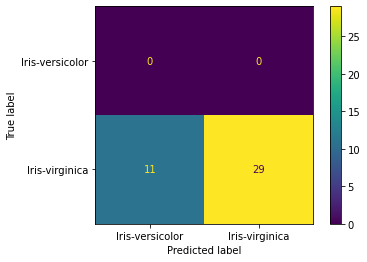

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay          # Importiere die Visualisierungsfunktion für Konfusionsmatrizen
ConfusionMatrixDisplay.from_predictions(y_test, y_test_vorhersage) # Gebe Konfusionsmatrix als Grafik aus 

Aha - in unserem Testdatensatz sind also nur Datenpunkte der Klasse *Iris-viginica* enthalten. Dies kann man daran sehen, dass es für die *Iris-setosa* gar keine Zeile gibt, und dass die Zeile für *Iris-versicolor* nur Nullen enthält. Wir können hier auch sehen, wie viele Exemplare es waren: es handelt sich um 40 Exemplare (11 falsch klassifizierte und 29 korrekt klassifizierte), was wie wir wissen der Anzahl der Testdaten entspricht. 

Warum haben wir dann nicht generell nur eine Zeile in dieser Matrix bekommen? Das liegt daran, dass eben einige der *Iris-virginica* fälschlicherweise als *Iris-versicolor* klassifiziert wurden: diese Verwechslung ist, wie wir eben gesehen haben, 11 mal passiert (wie man der ersten Zelle in Zeile zwei entnehmen kann).

Die Matrix zeigt also nur Zeilen und Spalten für die Klassen, die entweder in den Daten vorkamen oder die zumindest vorhergesagt wurden. 

Sehen wir uns mal an, wie die Konfusionsmatrix für die Trainingsdaten aussieht.

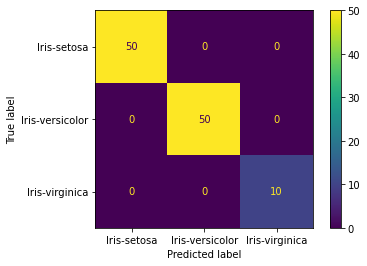

In [48]:
ConfusionMatrixDisplay.from_predictions(y_training, y_training_vorhersage) # Gebe Konfusionsmatrix als Grafik aus 

Diese Matrix sieht eher aus wie erwartet - sie hat drei Zeilen und drei Spalten. 

Wir haben aber das Problem gefunden!! Unser Modell hat während des Trainings nur sehr wenige Datenpunkte der Klasse *Iris-virginica* gesehen: nur 10 Stück.
Es hat gelernt, diese 10 Datenpunkte perfekt zu klassifizieren (siehe letzte Zelle der Diagonalen) - aber eben nur offensichtlich nicht genügend "Erfahrung" mit *Iris-virginica* gesammelt, um auf den 40 Exemplaren aus den Testdaten vergleichbar abzuschneiden - dort war die Quote mit 29 von 40 deutlich niedriger. Dem Entscheidungsbaum ist also auf den Trainingsdaten perfekt darin, diese Klasse zu erkennen, und auf den Trainingsdaten viel schlechter für diese Klasse - ein Fall von Overfitting! 

Wie können wir das Overfitting beheben? Oft hilft es, ein weniger komplexes Modell zu trainieren, also die Parameter zu nutzen, die den Baum einfach halten (siehe [Notebook zu den Parametern beim Training von Entscheidungsbäumen](https://colab.research.google.com/drive/12Bsc2Cnh7cjC9GC0vJVnrq948tcsm0ii?usp=sharing)). In unserem Fall ist es aber einfach so, dass das Modell sehr wenig Daten für die problematische Klasse gesehen hat. Woran liegt das?

Da alle der letzten 40 Datenpunkte der Klasse *Iris-virginica* angehören, und nur 10 Datenpunkte im Trainingsdatensatz diese Klasse haben, folgern wir, dass die Daten nach Klasse sortiert waren. Das bedeutet aber auch, dass wir gar nicht wissen, wie der Baum für Testdaten der beiden anderen Klassen abschneidet. Ob also generell Overfitting vorliegt, können wir hier nicht ersehen. 

Das Problem liegt darin, dass die Aufteilung in Test- und Trainingsdaten entsprechend ihrere Reihenfolge sehr ungeschickt war: bei sortierten Daten bekommt man dadurch in Test- und Trainingsdaten sehr unterschiedliche Klassenverteilungen. Also sollte es helfen, die Reihenfolge Daten vor der Aufteilung in Trainings- und Testdaten einmal zufällig zu mischen. Das probieren wir im nächsten Abschnitt aus. Vorher halten wir noch ein paar Erkenntnisse fest:


---

**Modelle müssen unbedingt mit einem Testdatensatz evaluiert werden, um Overfitting zu erkennen.**

**Wenn Trainings- und Testdaten aus derselben Quelle gezogen werden, sollte man die Reihenfolge der Datenpunkte unbedingt vor dem Aufteilen zufällig mischen!**

---

Wir haben außerdem gesehen, wie gut das Modell oben auf den Trainingsdaten funktioniert hat: es hat dort volle 100% erreicht. Das verdeutlicht, dass Modelle im Fall von Overfitting die Trainingsdaten perfekt modellieren können. Genau aus diesem Grund ist es unglaublich wichtig, sicher zu stellen, dass kein einziger Datenpunkt aus den Testdaten bereits in den Trainingsdaten enthalten war - sonst ist die Evaluierung sinnlos. 

---

**Trainings- und Testdaten dürfen sich auf keinen Fall überlappen - sonst ist die Evaluierung nicht aussagekräftig.**

---

## Aufteilung der Daten mit Mischen

Sehen wir uns nun an, wie ein Modell auf nicht gesehenen Daten funktioniert, wenn die Reihenfolge der Daten zufällig gemischt wurde.
Dazu benötigen wir eine neue Funktion `train_test_split`, die wir zunächst importieren müssen. Diese Funktion mischt die Daten zunächst, und teilt diese anschließen in einen Trainings- und ein Testdatensatz auf.

---

**Die Funktion `train_test_split()` aus `sklearn.model_selection` teilt Daten zufällig in Test- und Trainingsdaten auf und mischt dabei auch gleich die Reihenfolge der Datenpunkte.**

---

In [49]:
from sklearn.model_selection import train_test_split # Importiere die Aufteil-Funktion für Datensätze

Jetzt können wir unseren Datensatz in einem Schritt mischen und aufteilen.
Als Argumente für diese Funktion brauchen wir:

*   Unseren Datensatz (hier: `daten`)
*   `test_size`: Der Anteil der Testdaten (z.B. bedeutet 0.3, dass 30% der Daten als Testdaten und 70% als Trainingsdaten gezogen werden)
*  `random_state`: Achtung: dieses Argument ist zwar optional, aber wenn es nicht gesetzt wird, wird jedes Ausführen der Funktion ein anderes Ergebnis liefern! Falls wir also reproduzierbar arbeiten wollen, sollten wir diesen Wert auf eine Konstante setzen, siehe oben. 

Wir würden hier gerne 0.265 als Anteil für die Testdaten verwenden, weil wir damit genau die Aufteilung von oben bekämen, mit 110 zu 40. Es sei an dieser Stelle aber gesagt, dass 40 Datenpunkte zum Testen sehr wenig sind - hier können zufällige Schwankungen auftreten: verwendet man dann z.B. als Random Seed wieder die 42, landen zufällig scheinbar besonders "leichte" Fälle in den Testdaten, so dass wir dort unerwartet gute Ergebnisse bekommen. (Probieren Sie es gerne aus und ändern Sie den Parameter `test_size` im Code unten!) 

Wir nehmen daher sicherheitshalber mehr Daten zum Testen und teilen 50-50 auf, also geben wir als Option für `test_size` 0.5 an. 



In [50]:
# train_test_split gibt ein Paar zurück: die Trainings- und die Testdaten
# wir speichern es direkt in einem Paar von Variablen 
training_gemischt, test_gemischt = train_test_split(iris, test_size=0.5, random_state=42) # Mische Daten und ziehe 50% Testdaten, 50% Trainingsdaten

# die Attribute sowie die korrekten Klassen für die Trainingsdaten extrahieren
X_training_gemischt = training_gemischt[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge']] # Data Frames für die erklärenden Variablen generieren
y_training_gemischt = training_gemischt['Irisart'] # Data Frames für die erklärte Variable generieren

# die Attribute sowie die korrekten Klassen für die Testdaten extrahieren
X_test_gemischt = test_gemischt[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge']] # Data Frames für die erklärenden Variablen generieren
y_test_gemischt = test_gemischt['Irisart'] # Data Frames für die erklärte Variable generieren

In [51]:
print("Datenpunkte Training:", len(training_gemischt)) # Ausgeben, wie groß unser Training-Datensatz ist 
print("Datenpunkte Test:", len(test_gemischt)) # Ausgeben, wie groß unser Training-Datensatz ist

Datenpunkte Training: 75
Datenpunkte Test: 75


Nun trainieren wir wieder einen Entscheidungsbaum, diesmal auf den gemischten Trainingsdaten.
Außerdem berechnen wir die Klassen für den Testdatensatz.

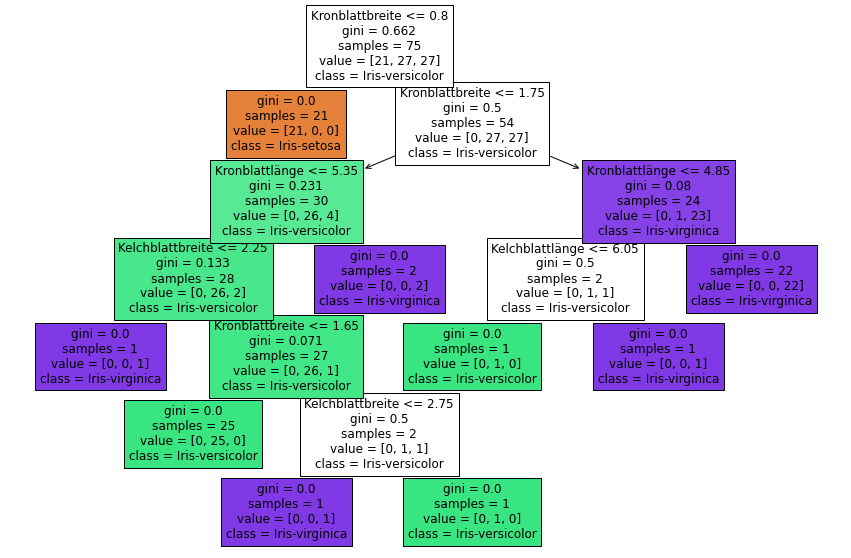

In [52]:
# Baum initialisieren (vorbereiten)
baum = tree.DecisionTreeClassifier()
# Baum trainieren
baum.fit(X_training_gemischt, y_training_gemischt)
# Baum grafisch darstellen
features = ['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge'] # Features benennen
klassen = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']                       # Klassen benennen
pyplot.figure(figsize=(15,10))                                               # Größere Grafikfläche vorbereiten
tree.plot_tree(baum,feature_names=features,class_names=klassen,filled=True); # Baum zeichnen

# Vorhersagen der Trainings- und Testdaten
y_training_gemischt_hut = baum.predict(X_training_gemischt)
y_test_gemischt_hut = baum.predict(X_test_gemischt)

Nun haben wir wieder eine Trainings-Accuracy von 100%:

In [53]:
accuracy_training = 100 * accuracy_score(y_true=y_training_gemischt, y_pred=y_training_gemischt_hut) # Berechne die Accuracy (Anteil korrekt vorhergesagter Klassen)
print(accuracy_training)

100.0


Auf den Testdaten erhalten wir:

In [54]:
accuracy_test = 100 * accuracy_score(y_true=y_test_gemischt, y_pred=y_test_gemischt_hut) # Berechne die Accuracy (Anteil korrekt vorhergesagter Klassen)
print(accuracy_test)


93.33333333333333


Das Modell funktioniert also auch auf ungesehenen Daten ganz gut (wir sind mit über 90% deutlich über der Accuracy von 72,5%, die wir mit der naiven Aufteilung oben erreicht haben). Trotzdem haben wir deutliches Overfitting: das Modell ist auf den Trainingsdaten noch deutlich besser als auf den Testdaten. Wir versuchen daher, das Overfittung auf den Trainingsdaten zu verringern, indem wir die maximale Baumtiefe erniedrigen.

---

**Wenn ein Modell auf den Trainingsdaten deutlich besser ist als auf den Testdaten, ist das meist ein Anzeichen von Overfitting.**

---

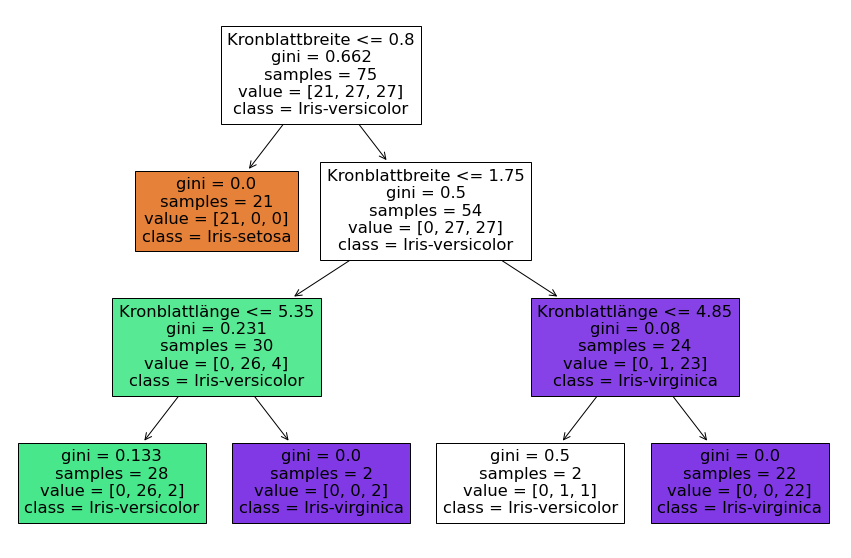

In [55]:
# Baum initialisieren (vorbereiten)
baum = tree.DecisionTreeClassifier(max_depth=3,random_state=42) # Maximale Baumtiefe von 3
# Baum trainieren
baum.fit(X_training_gemischt, y_training_gemischt)
# Baum grafisch darstellen
features = ['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge'] # Features benennen
klassen = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']                       # Klassen benennen
pyplot.figure(figsize=(15,10))                                               # Größere Grafikfläche vorbereiten
tree.plot_tree(baum,feature_names=features,class_names=klassen,filled=True); # Baum zeichnen

# Vorhersagen der Trainings- und Testdaten
y_training_gemischt_hut = baum.predict(X_training_gemischt)
y_test_gemischt_hut = baum.predict(X_test_gemischt)

Wenn wir jetzt die Accuracy auf den Trainingsdaten berechnen, werden wir feststellen, dass sie etwas schlechter ist als beim vorherigen Modell, da wir die Modellkapazität verringert haben:

In [56]:
accuracy_training = 100 * accuracy_score(y_true=y_training_gemischt, y_pred=y_training_gemischt_hut) # Berechne die Accuracy (Anteil korrekt vorhergesagter Klassen)
print(accuracy_training)

96.0


Allerdings hat unser Modell dadurch weniger Overfitting auf den Trainingsdaten und verallgemeinert daher besser für bisher nicht gesehene Daten (unser Testdatensatz):

In [57]:
accuracy_test = 100 * accuracy_score(y_true=y_test_gemischt, y_pred=y_test_gemischt_hut) # Berechne die Accuracy (Anteil korrekt vorhergesagter Klassen)
print(accuracy_test)

97.33333333333334


Wir erhalten nun auf Trainings- und Testdaten vergleichbare Ergebnisse. Dies deutet darauf hin, dass kein Overfitting vorliegt und das Modell gut verallgemeinert: es performt auf neuen Daten ähnlich gut wie auf den Trainingsdaten.  

---

**Vergleichbare Ergebnisse auf Trainings- und Testdaten deuten darauf hin, dass kein Overfitting vorliegt.**

---

## Weiteres Beispiel: Regression 

Auch bei Regression ist es wichtig, einen Teil der Daten als Testdaten vorzuhalten, wie wir gleich sehen werden.
Dazu laden wir zunächst unseren Regressions-Datensatz und trainieren ein lineares Regressionsmodell. 

Wir werden ein sehr einfaches Modell verwenden, bei dem wir die Anzahl der verkauften Portionen lediglich mithilfe der Höchsttemperatur vorhersagen wollen (das erleichtert die Visualisierung des linearen Regressionsmodells).

In [58]:
# Wetterdaten laden
wetter_url = 'https://github.com/antje-schweitzer/wetterdaten/raw/main/wetterdaten.csv'
wetter = pandas.read_csv(wetter_url)

# Eisdaten laden
eis_url = 'https://github.com/antje-schweitzer/eisverkauf2018/raw/main/eisverkauf.2018.csv'
eis = pandas.read_csv(eis_url)

# DataFrames wetter und eis zusammenführen
# Spalte 'Datum' als Schlüssel nutzen
gesamtdaten = pandas.merge(wetter,eis,left_on='Datum',right_on='Datum')
gesamtdaten.dropna(axis=0, how='any', inplace=True)
gesamtdaten

,Datum,Max,Wolken,Wochentag,Portionen
0,2018-01-01,9.4,6.6,1,0.0
1,2018-01-02,6.9,7.6,2,0.0
2,2018-01-03,13.1,7.6,3,80.0
3,2018-01-04,12.5,7.7,4,35.0
4,2018-01-05,11.5,7.7,5,27.0
...,...,...,...,...,...
360,2018-12-27,2.9,7.5,4,0.0
361,2018-12-28,2.1,6.9,5,0.0
362,2018-12-29,5.0,7.9,6,0.0
363,2018-12-30,6.0,7.8,0,13.0


Teilen wir nun wieder auf in Trainings- und Testdaten. Diesmal vergleichen wir sogar 2 unterschiedliche Mengen von Trainingsdaten: Wir nehmen die ersten 50 Datenpunkte als Trainingsdaten für ein erstes Modell, die nächsten 50 für ein zweites Modell, und dann noch einmal 50 als Testdaten. 

Wir trainieren dadurch Modell 1 auf den Daten von Januar bis Ende Februar und Modell 2 auf den Daten von Ende Februar bis Mitte April, während die Testdaten den Zeitraum von Mitte April bis Ende Mai umfassen. Können Sie sich denken, welches Modell auf den Testdaten besser abschneiden wird? 

In [59]:


# Trainingsdatensatz 1
X_training_1 = pandas.DataFrame(gesamtdaten[['Max']]).iloc[:50] # Data Frames für die erklärenden Variablen generieren
y_training_1 = pandas.DataFrame(gesamtdaten['Portionen']).iloc[:50] # Data Frames für die erklärte Variable generieren
print("Trainingsdaten 1:", len(X_training_1))

# Trainingsdatensatz 2
X_training_2 = pandas.DataFrame(gesamtdaten[['Max']]).iloc[50:100] # Data Frames für die erklärenden Variablen generieren
y_training_2 = pandas.DataFrame(gesamtdaten['Portionen']).iloc[50:100] # Data Frames für die erklärte Variable generieren
print("Trainingsdaten 2:", len(X_training_2))

# Testdaten
X_test = pandas.DataFrame(gesamtdaten[['Max']].iloc[100:150]) # Data Frames für die erklärenden Variablen generieren
y_test = pandas.DataFrame(gesamtdaten['Portionen'].iloc[100:150]) # Data Frames für die erklärte Variable generieren
print("Testdatenpunkte:", len(X_test))


Trainingsdaten 1: 50
Trainingsdaten 2: 50
Testdatenpunkte: 50


Trainieren wir nun ein Regressionsmodell auf beiden Traingsdatensätzen:

In [60]:
from sklearn.linear_model import LinearRegression

# Modell 1 trainieren
model1 = LinearRegression()
model1.fit(X_training_1,y_training_1)

# Modell 2 trainieren
model2 = LinearRegression()
model2.fit(X_training_2,y_training_2)

# für beide Modelle die vorhergesagten Werte berechnen
y_training_1_hut = model1.predict(X_training_1)
y_training_2_hut = model2.predict(X_training_2)

Die Regressionsgeraden sehen folgendermaßen aus:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


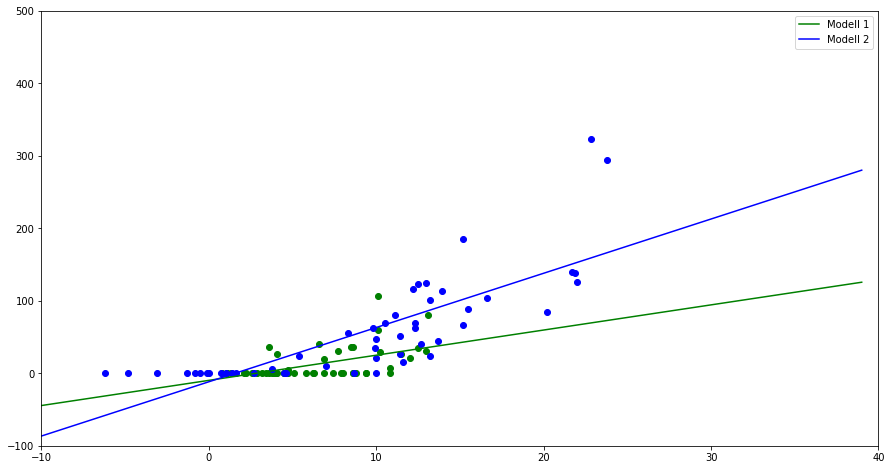

In [61]:
# Importiere die Bibliotheken zum Plotten
from matplotlib import pyplot as plt
import numpy

pyplot.figure(figsize=(15,8))                                               # Größere Grafikfläche vorbereiten
plt.scatter(X_training_1, y_training_1,color='g') # Plotte alle Datenpunkte aus Trainingsdaten 1
plt.scatter(X_training_2, y_training_2,color='b') # Plotte alle Datenpunkte aus Trainingsdaten 2
plt.plot(numpy.arange(-10,40), model1.predict(numpy.arange(-10,40).reshape(-1,1)),color='g',label="Modell 1")  # Plotte die Regressionsgerade von Modell 1
plt.plot(numpy.arange(-10,40), model2.predict(numpy.arange(-10,40).reshape(-1,1)),color='b',label="Modell 2")  # Plotte die Regressionsgerade von Modell 2
#plt.plot(X_training_1, y_training_1_hut,color='g',label="Modell 1")  # Plotte die Regressionsgerade von Modell 1 (also die vorhergesagten Werte)
#plt.plot(X_training_2, y_training_2_hut,color='b',label="Modell 2")  # Plotte die Regressionsgerade von Modell 2

plt.xlim([-10,40])   # Setze die sichtbare X-Achse auf den Bereich -10 bis 40
plt.ylim([-100,500]) # Setze die sichtbare Y-Achse auf den Bereich -100 bis 500
plt.legend()  # Zeige eine Legende, damit wir wissen, welche Geraden und Punkte zu welchem Datensatz gehören
plt.show()    # Zeige den Plot


Beide Modelle erzeugen offensichtlich deutlich andere Regressionsgeraden, da sie jeweils andere Trainingsdaten gesehen haben: die Gerade für Modell 1 ist deutlich flacher. 

Das liegt daran, dass die Trainingsdaten für Modell 1 mehr Tage mit 0 Verkäufen enthalten (da im Januar/Februar die Temperaturen niedriger sind, so dass es mehr Tage gibt, an denen gar kein Eis gekauft wird). Man kann sehen, dass viele grüne Punkte um die Null in einer Linie liegen. Auch einige der blauen Punkte liegen auf dieser Linie (tatsächlich waren die kältesten Tage ganz links alle in den Daten für Modell 2, es gab 2018 Ende Februar ein paar sehr kalte Tage), aber man sieht, dass es mehr blaue Punkte gibt, die oberhalb der Null liegen, und dass sie auch höhere Werte erreichen - das ist nicht unerwartet, im April ist es nicht ungewöhnlich, dass es auch Tage gibt, an denen viel Eis verkauft wird. 

Dadurch enthalten aber die Trainingsdaten für Modell 1 deutlich weniger Variation, wodurch die Regressionslinie flacher wird. 

Sehen wir uns die Evaluierungsmaße für diese Daten an. Die Methode `score()` berechnet für beide Modelle den Determinationskoeffizienten. Zur Erinnerung: Der Determinationskoeffizient drückt aus, wie viel der Varianz in den Daten vom Modell erklärt wird. 


In [62]:
# Gebe die scores beider Modelle auf ihren jeweiligen Trainingsdaten aus
print("Trainingsscore Modell 1:", model1.score(X_training_1,y_training_1))
print("Trainingsscore Modell 2:", model2.score(X_training_2,y_training_2))

Trainingsscore Modell 1: 0.27452511039110006
Trainingsscore Modell 2: 0.618455257449388


Wir sehen, dass Modell 2 deutlich mehr Varianz erklärt: fast 62%. Dagegen erklärt Modell 1 nur 27% der Varianz. 

Der Determinationskoeffizient ist praktisch, um zu sehen, wie viel Varianz in den Trainingsdaten erklärt wird. Allerdings kann man ihn nur bedingt nutzen, wenn man auf anderen Daten evaluiert. Wir weichen deshalb lieber auf den RMSE (den Root Means Squared Error) als Evaluationmaß aus. 

In `sklearn.metrics` gibt es keine Funktion, die den RMSE direkt berechnet - aber eine, mit der man den MSE berechnen kann: die Funktion `mean_squared_error`. Wir berechnen also erst den MSE und nutzen anschließend noch die Funktion `sqrt()` aus der `numpy`-Bibliothek, um die Wurzel (engl.: "square root") aus dem MSE zu ziehen, und erhalten damit den RMSE.

---

**Die Funktion `mean_squared_error()` aus `sklearn.metrics()` berechnet den Mean Squared Error.**

**Mit der Funktion `sqrt()` aus der Bibliothek `numpy` kann man die Wurzel ziehen.**

---

In [69]:
from sklearn.metrics import mean_squared_error        # Importiere die Funktion, die die Accuracy berechnen kann

mse1=mean_squared_error(y_true=y_training_1,y_pred=y_training_1_hut)
# mithilfe der Funktion sqrt aus numpy die Wurzel ziehen
rmse1=numpy.sqrt(mse1)
print('RMSE Modell 1:',rmse1)

mse2=mean_squared_error(y_true=y_training_2,y_pred=y_training_2_hut)
# mithilfe der Funktion sqrt aus numpy die Wurzel ziehen
rmse2=numpy.sqrt(mse2)
print('RMSE Modell 2:',rmse2)

RMSE Modell 1: 19.16123626420189
RMSE Modell 2: 43.86909838595567


Oha! Der Fehler ist bei Modell 2 größer - ist es denn nun schlechter? Aufgrund der Überlegungen oben und der Determinationskoeffizienten hätten wir ja eigentlich vermutet, dass Modell 2 das "bessere" Modell sein könnte. 

Das Problem liegt darin, dass wir hier unterschiedliche Daten zur Evaluierung genutzt haben. Und wie man dem Scatterplot oben entnehmen kann, ist in den Daten für Modell 2, also in den Daten für Ende Februar bis Mitte April, mehr Varianz. Dadurch kann aber auch der Fehler größer werden. Korrekter ist es deshalb, die beiden Modelle jeweils auf denselben Daten zu vergleichen (und wir wissen jetzt ja schon, dass man Modelle eigentlich sowieso auf neuen Testdaten evaluieren sollte, d.h. wir planen sowieso, gleich noch beide Modelle auf denselben Testdaten zu evaluieren). Vorher aber doch noch der gegenseitige Vergleich auf den Trainingsdaten:

In [70]:
# Auf den Trainingsdaten für Modell 1 haben wir den RMSE für Modell 1 schon berechnet:
print('RMSE Modell 1 auf Trainingsdaten 1:',rmse1)

# Wir haben für die Trainingsdaten 1 bisher nur die Vorhersagen für Modell 1
# also jetzt die Vorhersagen von Modell 2 berechnen
y_training_1_hut_model2 = model2.predict(X_training_1)
mse_daten1_model2=mean_squared_error(y_true=y_training_1,y_pred=y_training_1_hut_model2)
rmse_daten1_model2=numpy.sqrt(mse_daten1_model2)
print('RMSE Modell 2 auf Trainingsdaten 1:',rmse_daten1_model2)

# Auf den Trainingsdaten für Modell 2:
# Wir haben für die Trainingsdaten 2 bisher nur die Vorhersagen für Modell 2
# also jetzt die Vorhersagen von Modell 1 berechnen
y_training_2_hut_model1 = model1.predict(X_training_2)
# MSE berechnen
mse_daten2_model1=mean_squared_error(y_true=y_training_2,y_pred=y_training_2_hut_model1)
# RMSE
rmse_daten2_model1=numpy.sqrt(mse_daten2_model1)
print('RMSE Modell 1 auf Trainingsdaten 2:',rmse_daten2_model1)

# Auf den Trainingsdaten für Modell 2 haben wir den RMSE für Modell 2 schon berechnet:
print('RMSE Modell 2 auf Trainingsdaten 2:',rmse2)



RMSE Modell 1 auf Trainingsdaten 1: 19.16123626420189
RMSE Modell 2 auf Trainingsdaten 1: 33.470100132492206
RMSE Modell 1 auf Trainingsdaten 2: 63.714104193988256
RMSE Modell 2 auf Trainingsdaten 2: 43.86909838595567


Wir sehen hier, dass auf den Trainingsdaten von Modell 1 (sicherlich nicht überraschend!) Modell 1 den niedrigeren Fehler produziert, während auf den Traingsdaten von Modell 2 wiederum Modell 2 besser ist. Man kann auch sehen, dass die Differenz zwischen den Fehlern auf den Trainingsdaten 2 größer ist - weil dort eben auch mehr Varianz vorkommt. 

Wir wissen jetzt also nur, dass jedes Modell auf seinen eigenen Trainingsdaten besser ist. Interessant ist es nun, beide Modelle auf den Testdaten zu vergleichen. 

In [71]:
# Vorhersagen beider Modelle auf den Testdaten berechnen
y_test_hut_model1 = model1.predict(X_test)
y_test_hut_model2 = model2.predict(X_test)

# MSE berechnen
mse_test_1=mean_squared_error(y_true=y_test,y_pred=y_test_hut_model1)
mse_test_2=mean_squared_error(y_true=y_test,y_pred=y_test_hut_model2)

# daraus RMSE berechnen
rmse_test_1=numpy.sqrt(mse_test_1)
rmse_test_2=numpy.sqrt(mse_test_2)
print('RMSE Modell 1:',rmse_test_1)
print('RMSE Modell 2:',rmse_test_2)

RMSE Modell 1: 110.40954411740084
RMSE Modell 2: 54.60490314491372


Wir können hier also sehen, dass Modell 2 deutlich besser ist: der Fehler ist niedriger als bei Modell 1. Wir sehen hier aber auch, dass die Vorhersage von verkauften Portionen nur anhand der Temperatur sehr schwierig ist - ein RMSE  von 54.6 ist eher hoch (der RMSE liegt ja größenordnungsmäßig im Bereich der mittleren Fehler, d.h. das Modell liegt meist um ca. 55 Portionen daneben...).

Allerdings haben wir die Aufteilung in Trainings- und Testdaten wieder auf den sortierten Daten gemacht, und wir haben ja oben bereits gesehen, dass das keine gute Idee ist. Im vorliegenden Fall bedeutet das, dass auch die Testdaten wieder einen anderen Zeitraum mit noch höheren Temperaturen umfassen als die Trainingsdaten. Das kann man auch sehen, wenn man sich einen Scatterplot mit den drei Datenmengen ansieht: 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


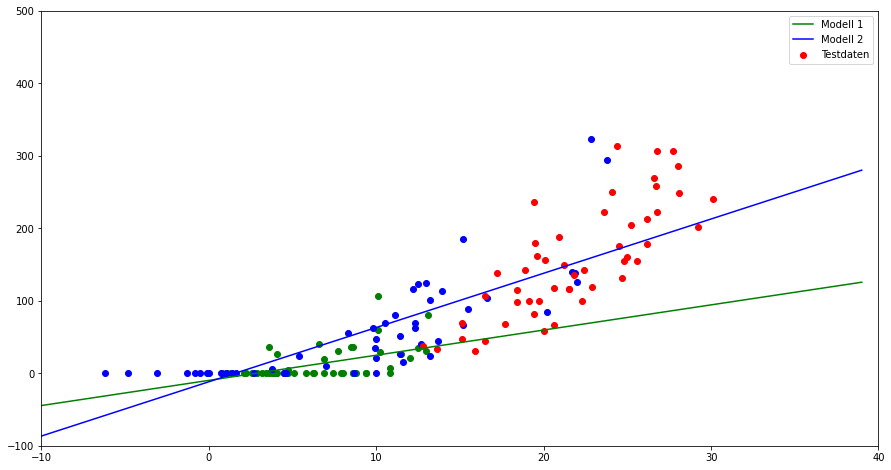

In [72]:
pyplot.figure(figsize=(15,8))                                               # Größere Grafikfläche vorbereiten
plt.scatter(X_training_1, y_training_1,color='g') # Plotte alle Datenpunkte aus Trainingsdaten 1
plt.scatter(X_training_2, y_training_2,color='b') # Plotte alle Datenpunkte aus Trainingsdaten 2
plt.scatter(X_test, y_test,color='r',label="Testdaten") # Plotte alle Datenpunkte aus den Testdaten

plt.plot(numpy.arange(-10,40), model1.predict(numpy.arange(-10,40).reshape(-1,1)),color='g',label="Modell 1")  # Plotte die Regressionsgerade von Modell 1
plt.plot(numpy.arange(-10,40), model2.predict(numpy.arange(-10,40).reshape(-1,1)),color='b',label="Modell 2")  # Plotte die Regressionsgerade von Modell 2

plt.xlim([-10,40])   # Setze die sichtbare X-Achse auf den Bereich -10 bis 40
plt.ylim([-100,500]) # Setze die sichtbare Y-Achse auf den Bereich -100 bis 500
plt.legend()  # Zeige eine Legende, damit wir wissen, welche Geraden und Punkte zu welchem Datensatz gehören
plt.show()    # Zeige den Plot


Hier zeigen die roten Punkte die Testdaten - und man kann direkt sehen, dass für sie keine der beiden Regressionslinien aus den Trainingsdaten optimal ist. Kein Wunder also, dass der Fehler groß ist. 

Der Grund liegt wie oben schon angedeutet darin, dass die Daten aus unterschiedlichen Zeiträumen und damit aus unterschiedlichen Jahreszeiten stammen. Das ist keine gute Idee: wenn man ein Modell auf Daten aus dem Winter trainiert, kann man nicht erwarten, dass es gute Vorhersagen für den Sommer macht. 

Die Winterdaten sind anders als die Sommerdaten. Generell sind die Winterdaten nicht repräsentativ für das ganze Jahr. Ebensowenig wären die Sommerdaten nicht repräsentativ für das ganze Jahr. Bei der Auswahl der Trainingsdaten ist es aber wichtig, möglichst repräsentative Daten auszuwählen. (Und ebenso bei der Auswahl der Testdaten, denn sonst weiß man hinterher nur, wie gut das Modell für eine bestimmte Jahreszeit funktioniert.)


---

**Sowohl Trainings- als auch Testdaten sollten möglichst repräsentativ für die gewünschte Anwendung des Modells sein.**

---

## Aufteilung der Daten mit Mischen

Versuchen wir es also wieder mit einer sinnvolleren Aufteilung in für das ganze Jahr repräsentative Test- und Trainingsdaten, bei der wir die Daten vorher mischen. Damit wir einen Eindruck bekommen, wie viel das bringt, verwenden wir dieselbe Menge an Datenpunkten für Training und Test wie eben, jeweils 50. Dafür teilen wir erst 50-50 auf (also `test_size` = 0.5), wählen aber anschließend nur je die ersten 50 Datenpunkte. 

In [117]:
# Daten bei der Aufteilung mischen
training_gemischt, test_gemischt = train_test_split(gesamtdaten, test_size=0.25, random_state=42) # Mische die Daten und ziehe 50% Testdaten, 50% Trainingsdaten

# Trainingsdatensatz: erste 50 Zeilen
X_training_gemischt = pandas.DataFrame(training_gemischt[['Max']]).iloc[:50] # Data Frames für die erklärenden Variablen generieren
y_training_gemischt = pandas.DataFrame(training_gemischt['Portionen']).iloc[:50] # Data Frames für die erklärte Variable generier
print("Trainingsdatenpunkte:", len(X_training_gemischt))

# Testdaten: erste 50 Zeilen
X_test_gemischt = pandas.DataFrame(test_gemischt[['Max']].iloc[:50]) # Data Frames für die erklärenden Variablen generieren
y_test_gemischt = pandas.DataFrame(test_gemischt['Portionen'].iloc[:50]) # Data Frames für die erklärte Variable generier
print("Testdatenpunkte:", len(X_test))

# Trainingsdatensatz 
# X_training_gemischt = pandas.DataFrame(training_gemischt[['Max']]) # Data Frames für die erklärenden Variablen generieren
# y_training_gemischt = pandas.DataFrame(training_gemischt['Portionen']) # Data Frames für die erklärte Variable generier
# print("Trainingsdatenpunkte:", len(X_training_gemischt))

# Testdaten
# X_test_gemischt = pandas.DataFrame(test_gemischt[['Max']]) # Data Frames für die erklärenden Variablen generieren
# y_test_gemischt = pandas.DataFrame(test_gemischt['Portionen']) # Data Frames für die erklärte Variable generier
# print("Testdatenpunkte:", len(X_test_gemischt))


Trainingsdatenpunkte: 50
Testdatenpunkte: 50


Anschließend trainieren wir ein neues Modell auf den Trainingsdaten und testen es auf den Testdaten. 

In [118]:
# ein drittes Modell trainieren
model3 = LinearRegression()
model3.fit(X_training_gemischt,y_training_gemischt)

#  die vorhergesagten Werte berechnen
y_training_hut = model3.predict(X_training_gemischt)
y_test_hut = model3.predict(X_test_gemischt)

# RMSE berechnen
mse_training = mean_squared_error(y_true=y_training_gemischt,y_pred=y_training_hut)
mse_test = mean_squared_error(y_true=y_test_gemischt,y_pred=y_test_hut)

# daraus RMSE berechnen
rmse_training=numpy.sqrt(mse_training)
rmse_test=numpy.sqrt(mse_test)
print('RMSE Training:',rmse_training)
print('RMSE Test:',rmse_test)

RMSE Training: 45.8592324295498
RMSE Test: 45.97502239005264


Diesmal ist das Modell auf den Testdaten praktisch gleich gut wie auf den Trainingsdaten. Es ist hier fast schon unerwartet, dass das Modell auf den Testdaten so ähnlich abschneidet: wir verwenden aktuell nur 50 Datenpunkt zum Testen, das sind nicht sehr viele, und es kann passieren, dass man per Zufall Testdaten bekommt, die für das Modell besonders "leicht" oder besonders "schwierig" sind, auf denen das Modell also deutlich besser oder schlechter funktioniert. 

Probieren Sie es aus und ändern Sie den `random_state` bei der Aufteilung - Sie werden sehen, dass Sie dann manchmal auch Fälle bekommen, wo der RMSE auf den Testdaten deutlich größer oder kleiner ist - ebenso natürlich auch Fälle, wo beide Fehler ähnlich groß sind. 

Wir halten also noch fest:

---

**Bei zu wenig Testdaten kann es passieren, dass  zufällig besonders "leichte" oder besonders "schwierige" Fälle in den Testdaten landen.**

---

Genauso hat natürlich auch die Menge der Trainingsdaten einen Effekt: wenn man sehr wenig Trainingsdaten hat, können auch dort zufällig besonders repräsentative Fälle oder besonders ungewöhnliche Fälle landen - und entsprechend gut oder schlecht generalisiert das Modell, d.h. entsprechend gut oder schlecht wird es auf repräsentativen Testdaten sein. 

---

**Bei zu wenig Trainingsdaten kann es passieren, dass zufällig wenig repräsentative Fälle in den Daten enthalten sind, so dass das Modell schlecht generiert.**

---

# Zusammenfassung

Wir haben in diesem Notebook gelernt, dass es sehr wichtig ist, immer einen Trainingsdatensatz zu haben, der keine Überschneidung mit den Trainingsdaten hat. Anhand der Beispiele haben wir gesehen, dass wir so Overfitting entdecken und vermeiden können.

Außerdem haben wir gesehen, wie wichtig es ist, die Datenreihenfolge zu mischen, wenn die Daten irgendwie sortiert sind.

Folgende wichtigen Punkte halten wir fest:

### Zusammenfassung Test- und Trainingsdaten

---

* Mithilfe unabhängiger Testdaten kann man überprüfen, wie gut ein Modell generalisiert.
* Üblicherweise verwendet man den Großteil der Daten zum Training und behält einen kleineren Teil zum Testen.
* Modelle müssen unbedingt mit einem Testdatensatz evaluiert werden, um Overfitting zu erkennen.
* Wenn Trainings- und Testdaten aus derselben Quelle gezogen werden, sollte man die Reihenfolge der Datenpunkte unbedingt vor dem Aufteilen zufällig mischen.
* Trainings- und Testdaten dürfen sich auf keinen Fall überlappen - sonst ist die Evaluierung nicht aussagekräftig.
* Wenn ein Modell auf den Trainingsdaten deutlich besser ist als auf den Testdaten, ist das meist ein Anzeichen von Overfitting.
* Vergleichbare Ergebnisse auf Trainings- und Testdaten deuten dagegen darauf hin, dass kein Overfitting vorliegt.
* Sowohl Trainings- als auch Testdaten sollten möglichst repräsentativ für die gewünschte Anwendung des Modells sein.
* Bei zu wenig Testdaten kann es passieren, dass zufällig besonders "leichte" oder besonders "schwierige" Fälle in den Testdaten landen.
* Bei zu wenig Trainingsdaten kann es passieren, dass zufällig wenig repräsentative Fälle in den Daten enthalten sind, so dass das Modell schlecht generiert.

---

### Zusammenfassung Programmieren

---

* Der Random Seed wird zur Initialisierung des Zufallsgenerators genutzt. Mit demselben Random Seed erhält man bei zufälligen Entscheidungen jedes Mal dieselbe Entscheidung bekommt.
* Die Funktion `train_test_split()` aus `sklearn.model_selection` teilt Daten zufällig in Test- und Trainingsdaten auf und mischt dabei auch gleich die Reihenfolge der Datenpunkte.
* Die Funktion `mean_squared_error()` aus `sklearn.metrics()` berechnet den Mean Squared Error.
* Mit der Funktion `sqrt()` aus der Bibliothek `numpy` kann man die Wurzel ziehen.

---

# Aufgabe

## 1. Was ist beim erstellen eines Testdatensatzes wichtig?

In [75]:
"""
Schreib deine Antwort hier

- Keiner der Testdatenpunkte darf je für das Training verwendet werden!
- Im Idealfall entspricht die Verteilung der Klassen im Testdatensatz ungefähr 
  dem wirklichen Einsatzgebiet
"""

'\nSchreib deine Antwort hier\n\n- Keiner der Testdatenpunkte darf je für das Training verwendet werden!\n- Im Idealfall entspricht die Verteilung der Klassen im Testdatensatz ungefähr \n  dem wirklichen Einsatzgebiet\n'

## 2. Warum ist es wichtig einen Testdatensatz zu verwenden? (Mindestens 2 Gründe nennen)

In [76]:
"""
1. Overfitting / Probleme erkennen


2. Performance im wirklichen Einsatz einschätzen

"""

'\n1. Overfitting / Probleme erkennen\n\n\n2. Performance im wirklichen Einsatz einschätzen\n\n'

## Zufallseffekte bei der Aufteilung

Wir haben oben festgestellt, dass der Zufall bei der Aufteilung der Daten in Trainings- und Testdaten eine Rolle spielen kann. Ihre Aufgabe ist jetzt, das noch einmal auszuprobieren.

Wir fangen an mit dem Effekt auf die Testdaten. 

### Die Testdaten

Teilen Sie die Daten so auf, dass Sie nur 10% zum Testen verwenden. Dadurch haben Sie weniger als 40 Datenpunkte zum Testen, und je nach Zufall sollten diese besonders leicht oder besonders schwer sein. 

Nutzen Sie dazu den Code von oben, aber entfernen Sie die Option `random_state`. Achtung, entfernen Sie dabei auch den Zusatz `.iloc[:50]`, der nur die ersten 50 Zeilen auswählt - wir wollen dieses Mal alle Daten nutzen. 

Führen Sie dann den Code zum Aufteilen und den Code zum Evaluieren mindestens 10 Mal aus und schreiben Sie sich auf, wie groß die Differenz im RSME zwischen Test- und Trainingsdaten jeweils ist. Achtung, vergessen Sie nicht, dass Sie beides, das Aufteilen und die Evaluierung, neu ausführen müssen, damit sich die Zahlen ändern.  

In [ ]:
# Daten aufteilen, 10% Testdaten
training_gemischt, test_gemischt = 

# Trainingsdatensatz 
...

# Testdaten
...

# ein Modell trainieren
...

#  die vorhergesagten Werte berechnen
...


# RMSE berechnen
...

# daraus RMSE berechnen und ausgeben
...


### Die Trainingsdaten 

Als nächstes sehen wir uns den Effekt bei den Trainingsdaten an. 

Teilen Sie die Daten so auf, dass Sie nur 10% zum Trainieren verwenden (also 90% zum Testen). Dadurch haben Sie weniger als 40 Datenpunkte zum Trainieren, und je nach Zufall sollte das Modell mehr oder weniger repräsentativ sein und damit mehr oder weniger gut auf den Testdaten funktionieren. 

Nutzen Sie auch dazu wieder den Code von oben, aber entfernen Sie die Option `random_state`. Führen Sie dann den Code wieder mindestens 10 Mal aus und schreiben Sie sich auf, wie groß die Differenz im RSME zwischen Test- und Trainingsdaten diesmal jeweils ist. 

In [ ]:
# Daten aufteilen, 90% Testdaten
training_gemischt, test_gemischt = 

# Trainingsdatensatz 
...

# Testdaten
...

# ein Modell trainieren
...

#  die vorhergesagten Werte berechnen
...


# RMSE berechnen
...

# daraus RMSE berechnen und ausgeben
...


### Mehr Daten, weniger Zufallseffekt

In den beiden Aufgaben oben hatten wir große Unterschiede, weil jeweils entweder die Testdaten oder die Trainingsdaten sehr klein waren. Dadurch spürt man den Zufall stärker - bei wenigen Exemplaren ist die Gefahr größer, dass besonders viele davon ungewöhnlich sind. 

Teilen Sie daher als letztes die Daten 50-50 auf. Dies ist eine ungewöhnliche Aufteilung, wir haben ja gelernt, dass man normalerweise den Großteil zum Testen nimmt. Hier hilft es uns aber, beide Mengen groß zu halten - wir haben dann jedesmal ca. 180 Exemplare. 

Welche Differenzen bekommen Sie nun maximal, wenn Sie den Code wieder 10 mal ausführen? 

In [ ]:
# Daten aufteilen, 50% Testdaten
training_gemischt, test_gemischt = 

# Trainingsdatensatz 
...

# Testdaten
...

# ein Modell trainieren
...

#  die vorhergesagten Werte berechnen
...


# RMSE berechnen
...

# daraus RMSE berechnen und ausgeben
...
